<font size="5">Prediction of heart disease based on symptoms and patient characteristics proposal</font>


DSCI 100 section 010 group 22:  Emily Chen, Mehakpreet Dhaliwal, Haoxi Jiang, Manika Mohinani. 


<font size="4"> Introduction: </font>

Heart disease, a term used to refer to several types of heart conditions, is one of the leading causes of death worldwide. Various factors, including lifestyle, genetic predisposition, age, and sex, can influence an individual’s likelihood of developing heart disease. By understanding the intricate interplay between these different contributors, global healthcare agencies can work towards the creation and improvement of early detection and prevention strategies. From previous literature and health authorities, angina, commonly known as chest pain, is a significant factor in the diagnosis of heart disease, along with age factors, cholesterol levels, and blood pressure. Through this project, we aim to address the question “Can we create a model to predict whether an individual in Cleveland is likely to have heart disease based on specific symptoms and biology of patients?” We will utilise the processed Cleveland data from the dataset ‘Heart Disease’ provided by ‘UC Irvine Machine Learning Repository’, focusing on variables such as sex and maximum heart rate achieved. This dataset contains information on a patient's characteristics, diagnostic test results and the absence or presence of heart disease. 


<font size="4"> Research Question: Can we create a model to predict whether an individual is likely to have heart disease based on sex and maximum heart rate achieved? 
 </font>

The data set that we are going to use for this project is the heart disease data set provided by the course Canvas. More specifically, we are using the processed cleveland data set. 

<font size="4"> Preliminary exploratory data analysis: </font>

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
url <- "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"

In [3]:
destination_dir <- "heart_disease_dataset"

In [4]:
download.file(url, destfile = "heart_disease.zip", mode = "wb")

In [5]:
unzip("heart_disease.zip", exdir = destination_dir)

In [6]:
list.files(destination_dir)

[1] "ask-detrano"                "bak"                       
 [3] "cleve.mod"                  "cleveland.data"            
 [5] "costs"                      "heart-disease.names"       
 [7] "hungarian.data"             "Index"                     
 [9] "long-beach-va.data"         "new.data"                  
[11] "processed.cleveland.data"   "processed.hungarian.data"  
[13] "processed.switzerland.data" "processed.va.data"         
[15] "reprocessed.hungarian.data" "switzerland.data"          
[17] "WARNING"

In [7]:
heart_data <- read.csv(file.path(destination_dir, "processed.cleveland.data"), header = FALSE, na.strings = c("", "?"))
heart_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7,2


In [8]:
column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target")

In [9]:
heart_data <- read.csv(file.path(destination_dir, "processed.cleveland.data"), header = FALSE, col.names = column_names, na.strings = c("", "?", "NA"))
heart_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7,2


In [10]:
heart_data_clean <- heart_data |>
mutate_all(as.numeric) |>
na.omit()

heart_data_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
7,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
8,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
9,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2


In [11]:
set.seed(123)
heart_disease_split <- initial_split(heart_data_clean, prop = 0.75, strata = target)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

<font size="3">**Chest pain type and age relationship**</font>

In [12]:
table_data <- heart_disease_train |>
select("cp", "age", "chol", "trestbps", "target")


heart_cp_age <- table_data |>
group_by(target) |>
summarise(mean_cp = mean(cp), 
          mean_age = mean(age))
heart_cp_age 

target,mean_cp,mean_age
<dbl>,<dbl>,<dbl>
0,2.798319,53.02521
1,3.475000,56.75000
2,3.703704,58.55556
3,3.807692,56.46154
4,3.600000,58.40000


In [13]:
heart_cp_age_chart <- table_data |>
group_by(target) |>
summarise(across(c(cp, age)))
heart_cp_age_chart 

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'target'. You can override using the
`.groups` argument.


target,cp,age
<dbl>,<dbl>,<dbl>
0,2,56
0,4,57
0,4,57
0,2,56
0,2,44
0,3,52
0,4,54
0,3,48
0,2,49


<font size="3">**Chest pain type vs age graph**</font>

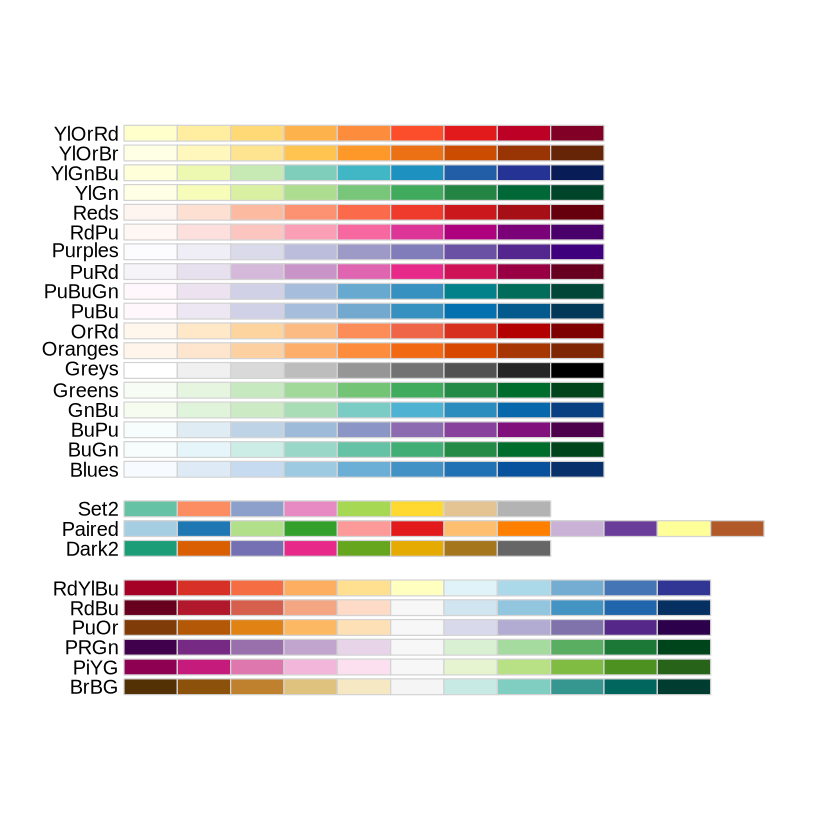

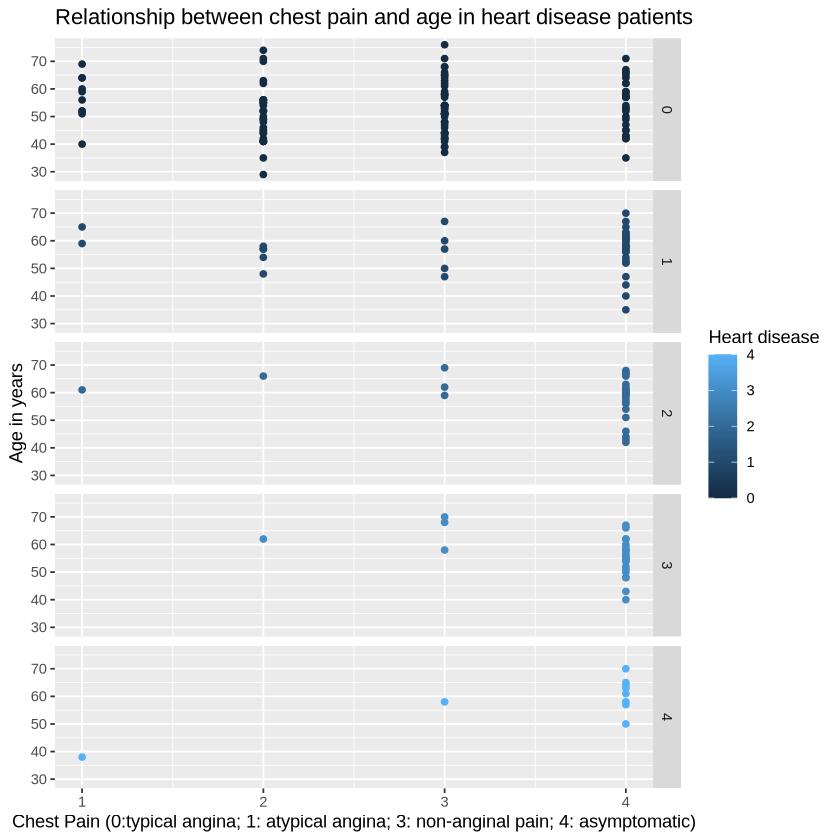

In [14]:
library(RColorBrewer)
display.brewer.all(colorblindFriendly = TRUE)

heart_cp_age_plot<- ggplot(heart_cp_age_chart, aes(x = cp, y= age, color= target)) +
geom_point()+labs(x = "Chest Pain (0:typical angina; 1: atypical angina; 3: non-anginal pain; 4: asymptomatic)", y = "Age in years", 
                  title = "Relationship between chest pain and age in heart disease patients", color = "Heart disease")+
facet_grid(rows=vars(target))
heart_cp_age_plot


In [15]:
# number of obs
heart_disease_table_2 <- table_data |> 
group_by(target) |>
summarise(n_obs = n())
heart_disease_table_2


target,n_obs
<dbl>,<int>
0,119
1,40
2,27
3,26
4,10


<font size="3">**Chest pain type and cholesterol relationship**</font>

target,mean_cp,mean_chol
<dbl>,<dbl>,<dbl>
0,2.798319,240.5966
1,3.475000,245.2500
2,3.703704,251.1111
3,3.807692,239.5385
4,3.600000,249.5000


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'target'. You can override using the
`.groups` argument.


target,cp,chol
<dbl>,<dbl>,<dbl>
0,2,236
0,4,354
0,4,192
0,2,294
0,2,263
0,3,199
0,4,239
0,3,275
0,2,266


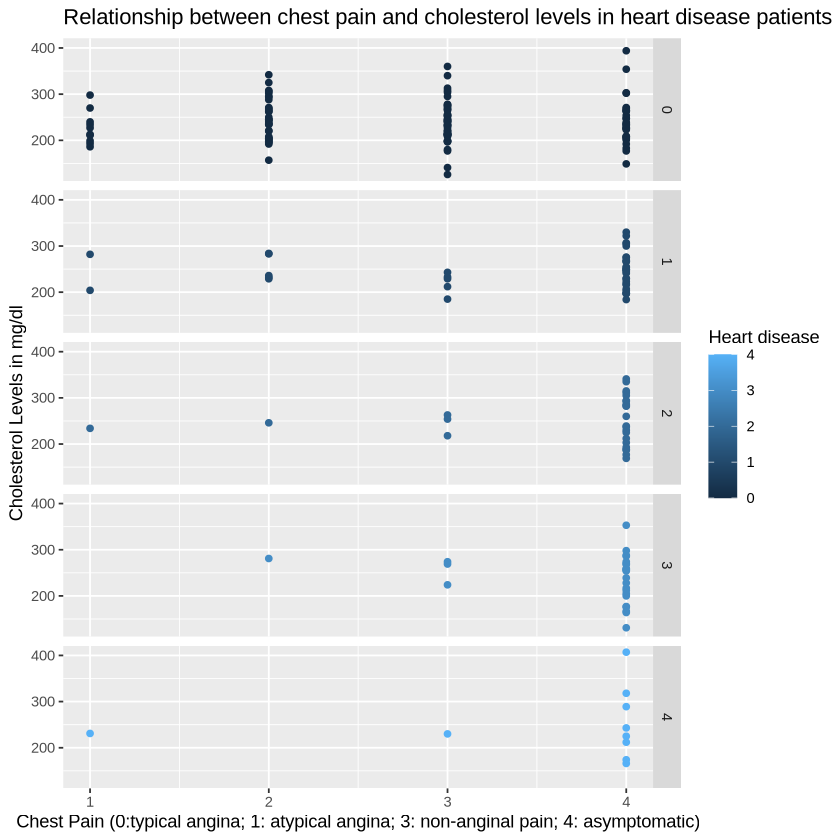

In [16]:
heart_cp_chol <- table_data |>
group_by(target) |>
summarise(mean_cp = mean(cp), 
          mean_chol = mean(chol))
heart_cp_chol 

heart_cp_chol_chart <- table_data |>
group_by(target) |>
summarise(across(c(cp, chol)))
heart_cp_chol_chart

heart_cp_age_plot<- ggplot(heart_cp_chol_chart, aes(x = cp, y= chol, color= target)) +
geom_point()+labs(x = "Chest Pain (0:typical angina; 1: atypical angina; 3: non-anginal pain; 4: asymptomatic)", y = "Cholesterol Levels in mg/dl", 
                  title = "Relationship between chest pain and cholesterol levels in heart disease patients", color = "Heart disease")+
facet_grid(rows=vars(target))
heart_cp_age_plot


<font size="3">**Chest pain type and resting blood pressure relationship**</font>

target,mean_cp,mean_chol
<dbl>,<dbl>,<dbl>
0,2.798319,128.7983
1,3.475000,133.1750
2,3.703704,133.7778
3,3.807692,140.0769
4,3.600000,138.9000


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'target'. You can override using the
`.groups` argument.


target,cp,trestbps
<dbl>,<dbl>,<dbl>
0,2,120
0,4,120
0,4,140
0,2,140
0,2,120
0,3,172
0,4,140
0,3,130
0,2,130


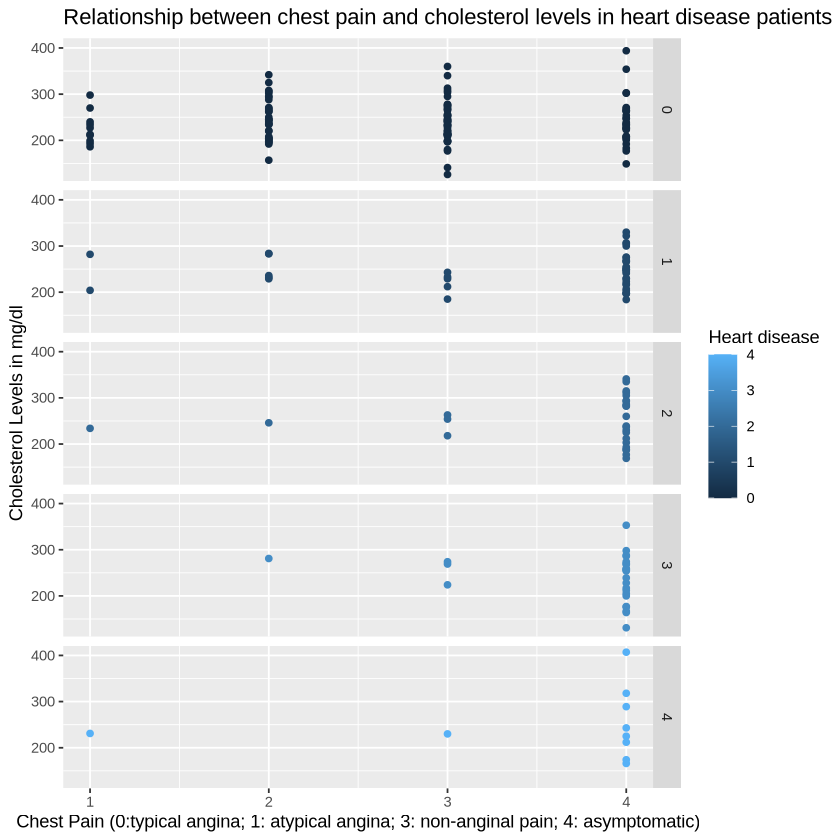

In [17]:
heart_cp_trestbps <- table_data |>
group_by(target) |>
summarise(mean_cp = mean(cp), 
          mean_chol = mean(trestbps))
heart_cp_trestbps 

heart_cp_trestbps_chart <- table_data |>
group_by(target) |>
summarise(across(c(cp, trestbps)))
heart_cp_trestbps_chart

heart_cp_trestbps_plot<- ggplot(heart_cp_trestbps_chart, aes(x = cp, y= trestbps, color= target)) +
geom_point()+labs(x = "Chest Pain (0:typical angina; 1: atypical angina; 3: non-anginal pain; 4: asymptomatic)", y = "Resting blood pressure in mm Hg", 
                  title = "Relationship between chest pain and resting blood pressure in heart disease patients", color = "Heart disease")+
facet_grid(rows=vars(target))
heart_cp_age_plot


<font size="4"> Methods:  </font>

We plan to use K-nearest neighbor classification algorithm to predict and determine the type or class of heart disease using given information about the patients and evaluate the effectiveness of our model. The classification algorithm is used because we are predicting the targets that represent distinct heart disease, which are categorical variables. The considered predictors are chest pain (angina) with the following variables: age, cholesterol levels in blood, and resting blood pressure, respectively. 

We will create visualizations and scatterplots to showcase the relationship of angina and each factor for each category of heart disease separately and adapt angina with each factor into a classification model to predict the target, which represents the category of heart disease. We will create and test our model using the data by putting it together in a workflow. Our k value will be chosen after conducting a cross-validation for 5-fold test and then plot the RMSE to decide on the optimal k value with the least prediction error. 

Lastly, we will tune and evaluate which model offers the most reliable and accurate results using metrics and calculating precision, accuracy, and recall. However, there are limitations to our model and method. We used a singular dataset with limited data; there were only 14 variables measured. Hence, our model may only represent and make predictions based on the limited data in the dataset, which may compromise the ability of the model in applications with larger populations with more comprehensive data collected. 


<font size="4"> Expected outcomes and significance:  </font>

We anticipate identifying whether significant indicators can predict and classify heart disease in individuals. The model is expected to accurately classify individuals at risk of heart disease based on these factors. More specifically, due to past research, we expect the model to present that the individual will be more likely to have heart disease given a history of chest pain, increased age, increased cholesterol, and increased basal blood pressure. The insights gained from the data analysis of the information generated can aid healthcare practitioners in identifying high risk individuals for early intervention and preventative measures to reduce mortality rates. Our study and models can first filter appropriate and reliable models that implements specific variables from a given dataset to make predictions of heart disease, which also establishes a platform upon which other studies can build. 

To further implement the prediction model, it will be useful to collect data from more individuals based on other factors and potential interactions, both social, biological, and molecular, such as family history of coronary heart disease to train and develop the classification model to make better predictions of heart disease and individual risk for larger populations and better accessibility in low-prevalence and low-income areas with a lack of diagnostic tools.  


<font size="4"> Reference:  </font>

Heart Disease. (2022). Retrieved March 8, 2024, from https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118

5 Heart Numbers You Need to Know. (n.d.). Retrieved March 8, 2024, from https://www.hopkinsmedicine.org/health/wellness-and-prevention/5-heart-numbers-you-need-to-know

Bösner, S., Boesner, S., Becker, A., Abu Hani, M., Keller, H., Soennichsen, A. C., Haasenritter, J., Karatolios, K., Schaefer, J. R., Baum, E., & Donner-Banzhoff, N. (2010). Accuracy of symptoms and signs for coronary heart disease assessed in primary care. British Journal of General Practice, 60(575), e246-e257. https://doi.org/10.3399/bjgp10X502137
